In [2]:
#BIBLIOTECAS IMPORTADAS
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import csv
from pandas import DataFrame

# Preço do gás

Neste trabalho utilizaremos dados da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP) divulgados semanalmente sobre os preços do gás, diesel e outros combustíveis usados em transportes no Brasil.

Focaremos o estudo no valor e na taxa de variação dos 2 tipos de gás utilizados: 'GLP' e 'GNV'.

Fonte: https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil

In [3]:
gas = pd.read_csv("C:\\Users\\malta\\Desktop\\Pós Graduação\\Introdução ao Python\\curso_python\\trabalhos\\2004-2019.tsv", sep="\t")

In [4]:
gas

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,...,3.690,0.818,0.018,2.756,0,2.756,2.756,0,6,2019
106819,106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,...,3.789,0.95,0.038,2.451,0.402,1.9842,2.8661,0.164,6,2019
106820,106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,...,3.499,0.914,0.065,1.998,0,1.9981,1.9981,0,6,2019
106821,106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,...,3.490,0.646,0.076,2.374,0.165,2.0179,2.5093,0.07,6,2019


In [5]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     106823 non-null  int64  
 1   DATA INICIAL                   106823 non-null  object 
 2   DATA FINAL                     106823 non-null  object 
 3   REGIÃO                         106823 non-null  object 
 4   ESTADO                         106823 non-null  object 
 5   PRODUTO                        106823 non-null  object 
 6   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 7   UNIDADE DE MEDIDA              106823 non-null  object 
 8   PREÇO MÉDIO REVENDA            106823 non-null  float64
 9   DESVIO PADRÃO REVENDA          106823 non-null  float64
 10  PREÇO MÍNIMO REVENDA           106823 non-null  float64
 11  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 12  MARGEM MÉDIA REVENDA          

Transformando "DATA INICIAL" e "DATA FINAL" de object para datetime.

In [6]:
gas["DATA INICIAL"] = pd.to_datetime(gas["DATA INICIAL"])
gas["DATA FINAL"] = pd.to_datetime(gas["DATA FINAL"])

In [7]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     106823 non-null  int64         
 1   DATA INICIAL                   106823 non-null  datetime64[ns]
 2   DATA FINAL                     106823 non-null  datetime64[ns]
 3   REGIÃO                         106823 non-null  object        
 4   ESTADO                         106823 non-null  object        
 5   PRODUTO                        106823 non-null  object        
 6   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64         
 7   UNIDADE DE MEDIDA              106823 non-null  object        
 8   PREÇO MÉDIO REVENDA            106823 non-null  float64       
 9   DESVIO PADRÃO REVENDA          106823 non-null  float64       
 10  PREÇO MÍNIMO REVENDA           106823 non-null  float64       
 11  

# Parte 2

In [25]:
gas['ESTADO'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [27]:
gas['ESTADO'].nunique()

27

In [9]:
gas['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

## Estados com o maior número de postos

In [74]:
gas2 = gas.loc[(gas["PRODUTO"]=='GLP')|(gas["PRODUTO"]=='GNV')]
gas2

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
24132,24132,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,GLP,44,R$/13Kg,33.989,0.803,...,36.000,6.824,0.024,27.165,3.062,25,29.33,0.113,5,2004
24133,24133,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,GLP,372,R$/13Kg,30.335,1.841,...,36.000,5.328,0.061,25.007,1.756,19.4983,29,0.07,5,2004
24134,24134,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,GLP,97,R$/13Kg,38.568,2.045,...,44.000,5.713,0.053,32.855,2.296,27.75,38,0.07,5,2004
24135,24135,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,GLP,109,R$/13Kg,33.388,2.308,...,39.000,4.585,0.069,28.803,1.764,24,33,0.061,5,2004
24136,24136,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,GLP,22,R$/13Kg,32.391,1.357,...,33.000,7.641,0.042,24.75,0.354,24.5,25,0.014,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,...,3.690,0.818,0.018,2.756,0,2.756,2.756,0,6,2019
106819,106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,...,3.789,0.95,0.038,2.451,0.402,1.9842,2.8661,0.164,6,2019
106820,106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,...,3.499,0.914,0.065,1.998,0,1.9981,1.9981,0,6,2019
106821,106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,...,3.490,0.646,0.076,2.374,0.165,2.0179,2.5093,0.07,6,2019


In [84]:
pivot = gas2.pivot_table(index=["PRODUTO", "ESTADO"], aggfunc='size')
pivot.sort_values(ascending=False)

PRODUTO  ESTADO             
GLP      TOCANTINS              785
GNV      CEARA                  785
GLP      SAO PAULO              785
         SANTA CATARINA         785
         RORAIMA                785
         RONDONIA               785
         RIO GRANDE DO SUL      785
         RIO GRANDE DO NORTE    785
         RIO DE JANEIRO         785
         PERNAMBUCO             785
         PARANA                 785
         PARAIBA                785
         PARA                   785
         MINAS GERAIS           785
         MATO GROSSO DO SUL     785
         MATO GROSSO            785
         CEARA                  785
         BAHIA                  785
         AMAZONAS               785
GNV      BAHIA                  785
GLP      ACRE                   785
GNV      SANTA CATARINA         785
         SAO PAULO              785
         RIO GRANDE DO SUL      785
         RIO GRANDE DO NORTE    785
         RIO DE JANEIRO         785
         PERNAMBUCO             785

(array([0.34044418, 0.        , 0.92314436, 0.        , 0.        ,
        0.43476037, 0.        , 0.45843074, 0.        , 0.34322034]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

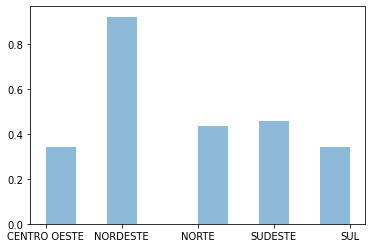

In [100]:
plt.hist(data=gas2,x="REGIÃO", alpha=0.5,density=True)

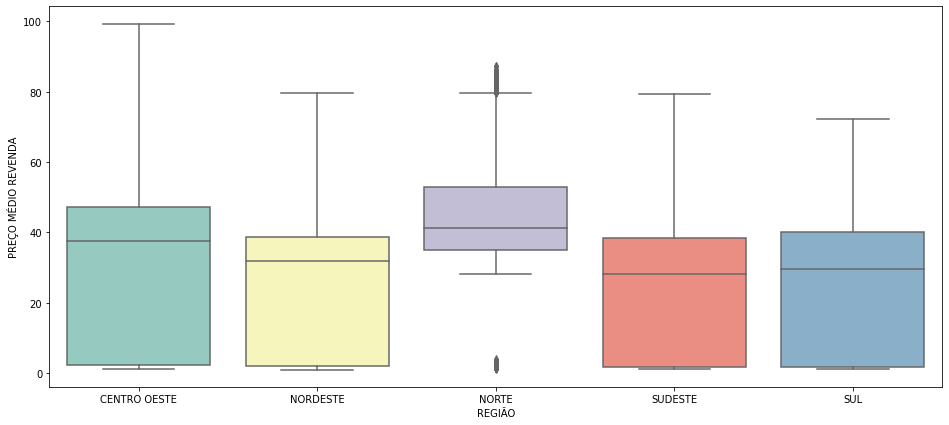

In [128]:
plt.subplots(figsize=(16, 7))
ax = sns.boxplot(x="REGIÃO", y="PREÇO MÉDIO REVENDA", data=gas2, palette = 'Set3')

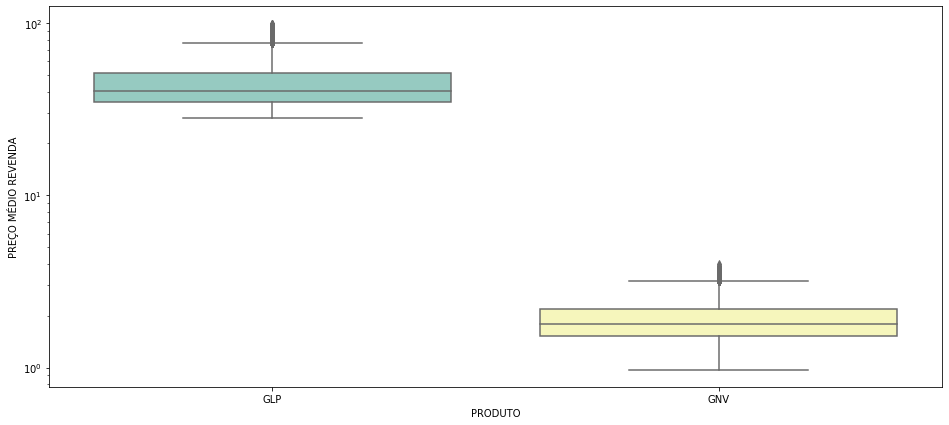

In [129]:
plt.subplots(figsize=(16, 7))
ax = sns.boxplot(x="PRODUTO", y="PREÇO MÉDIO REVENDA", data=gas2, palette = 'Set3')
ax.set_yscale('log')

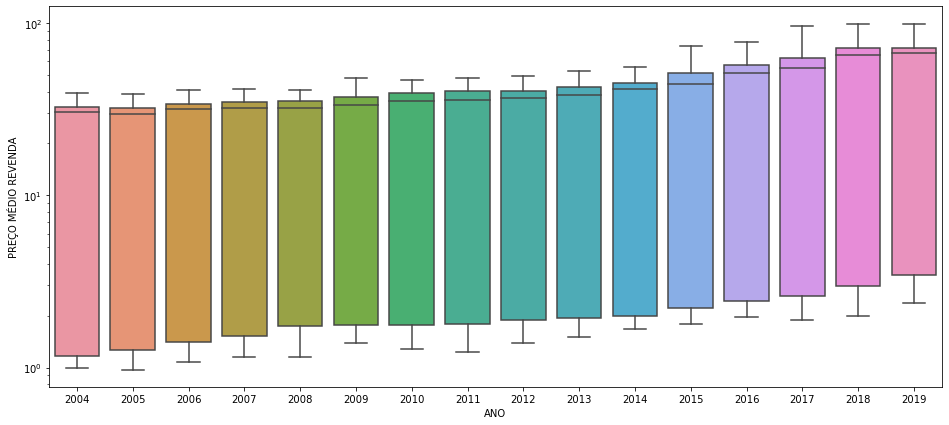

In [130]:
plt.subplots(figsize=(16, 7))
ax = sns.boxplot(x="ANO", y="PREÇO MÉDIO REVENDA", data=gas2)
ax.set_yscale('log')

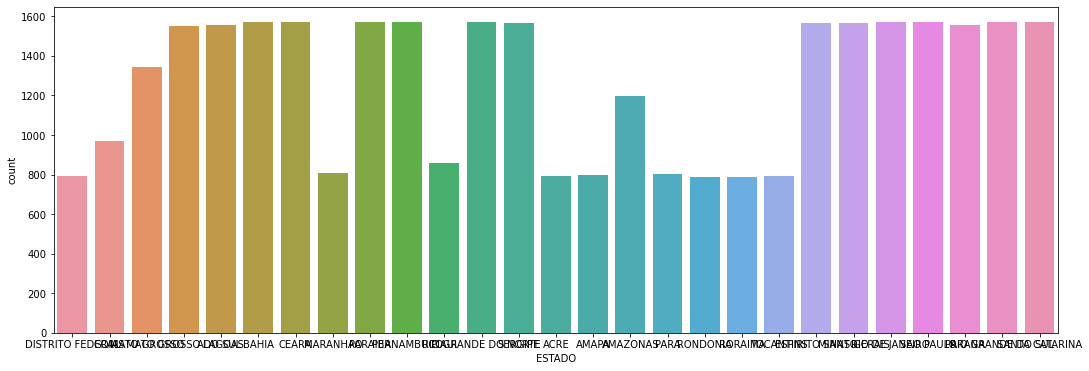

In [135]:
ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x="ESTADO", data=gas2)

Em uma primeira análise exploratória podemos perceber que a região Nordeste possui a maior quantidade de postos de abastecimento de gás e a região Norte tem o maior preço de revenda de gás para veículos.
Observamos também que o GLP (Gás liquefeito de petróleo) é mais caro que o GNV (Gás natural veicular). Além disso, o valor médio de revenda vem aumentando continuamente desde 2004.

## Região com o maior preço

In [39]:
gas.query('ANO!=2019 & PRODUTO in ["GLV","GNV"]').groupby(['ANO', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   REGIÃO      
2004  CENTRO OESTE      38.524
      NORDESTE         299.888
      SUDESTE          150.806
      SUL              121.749
2005  CENTRO OESTE      63.905
                        ...   
2018  CENTRO OESTE     200.409
      NORDESTE        1092.451
      NORTE             90.970
      SUDESTE          559.172
      SUL              422.553
Name: PREÇO MÉDIO REVENDA, Length: 74, dtype: float64

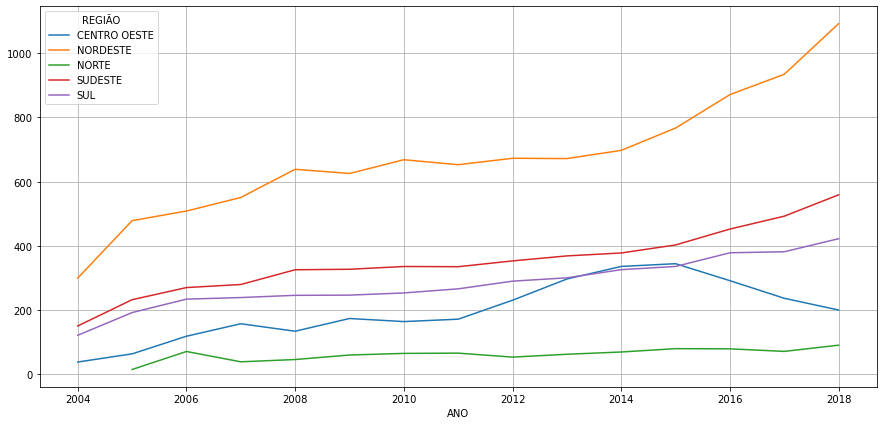

In [44]:
# Gráfico do preço médio de revenda por ano divido por região
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & PRODUTO in ["GLV","GNV"]').groupby(['ANO', 'REGIÃO']).sum()['PREÇO MÉDIO REVENDA'].unstack().plot(ax=ax)
plt.grid(True)

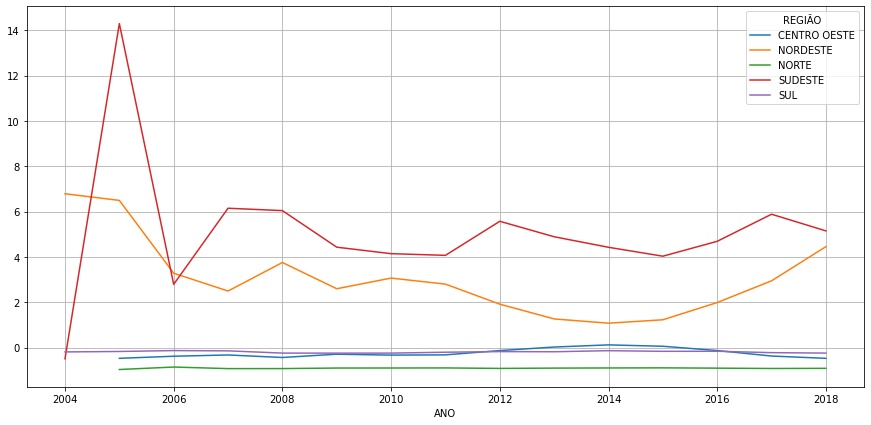

In [45]:
# Gráfico da taxa de mudança de preço por ano divido por região 
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & PRODUTO in ["GLV","GNV"]').groupby(['ANO', 'REGIÃO']).sum()['PREÇO MÉDIO REVENDA'].pct_change().unstack().plot(ax=ax)
plt.grid(True)

Podemos observar que as regiões Nordeste e Sudeste apresentaram os maiores valores no preço dos combustíveis, respectivamente, assim como a maior taxa no aumento dos preços. A seguir, consideraremos os preços e taxas de variação por estado nas diferentes regiões.

### Nordeste

In [101]:
gas.query('ANO!=2019 & REGIÃO in ["NORDESTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   ESTADO             
2004  ALAGOAS                1261.541
      BAHIA                  1299.110
      CEARA                  1304.147
      MARANHAO               1292.654
      PARAIBA                1362.776
                               ...   
2018  PARAIBA                4341.294
      PERNAMBUCO             4218.196
      PIAUI                  4313.360
      RIO GRANDE DO NORTE    4367.015
      SERGIPE                4765.553
Name: PREÇO MÉDIO REVENDA, Length: 135, dtype: float64

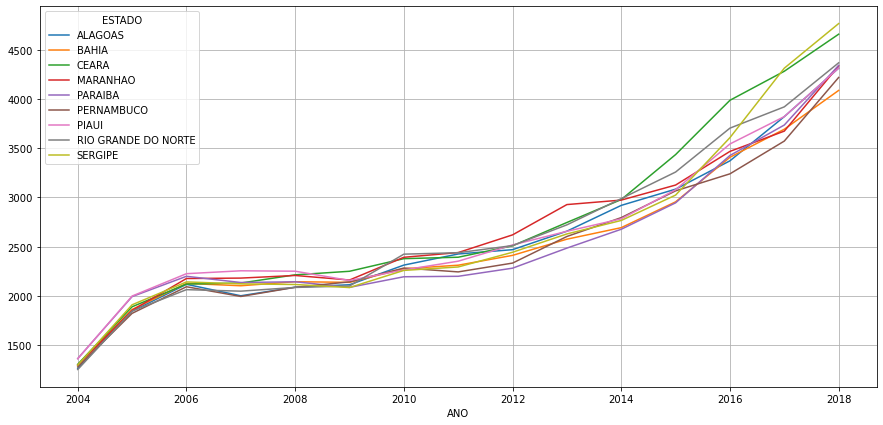

In [105]:
# Preço médio por ano nos estados
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["NORDESTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

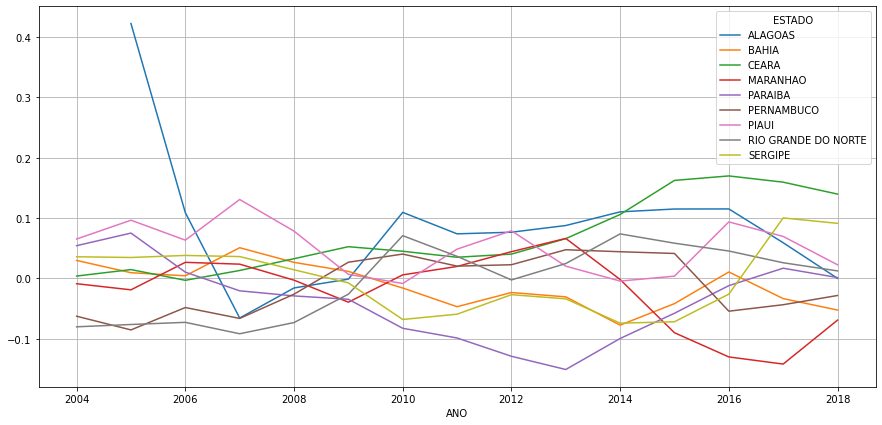

In [104]:
# Taxa de mudança de preço por ano nos estados. 
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["NORDESTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').pct_change().unstack().plot(ax=ax)
plt.grid(True)

Observamos que Sergipe e Ceará tiveram a maior alta nos preços entre 2004 e 2018. Podemos ver também que a taxa de aumento do Ceará foi por volta de 15%, enquanto em Sergipe foi de aproximadamente 10%.

### Sudeste

In [110]:
gas.query('ANO!=2019 & REGIÃO in ["SUDESTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   ESTADO        
2004  ESPIRITO SANTO    1212.233
      MINAS GERAIS      1208.464
      RIO DE JANEIRO    1201.368
      SAO PAULO         1174.554
2005  ESPIRITO SANTO    1807.351
      MINAS GERAIS      1833.436
      RIO DE JANEIRO    1800.974
      SAO PAULO         1741.454
2006  ESPIRITO SANTO    2145.584
      MINAS GERAIS      2157.655
      RIO DE JANEIRO    2038.923
      SAO PAULO         1982.519
2007  ESPIRITO SANTO    2160.008
      MINAS GERAIS      2180.974
      RIO DE JANEIRO    2034.971
      SAO PAULO         1982.277
2008  ESPIRITO SANTO    2165.008
      MINAS GERAIS      2199.755
      RIO DE JANEIRO    2055.251
      SAO PAULO         2015.210
2009  ESPIRITO SANTO    2099.328
      MINAS GERAIS      2295.157
      RIO DE JANEIRO    2093.606
      SAO PAULO         2103.244
2010  ESPIRITO SANTO    2243.220
      MINAS GERAIS      2524.724
      RIO DE JANEIRO    2391.877
      SAO PAULO         2348.241
2011  ESPIRITO SANTO    2330.462
      MINAS GERAIS    

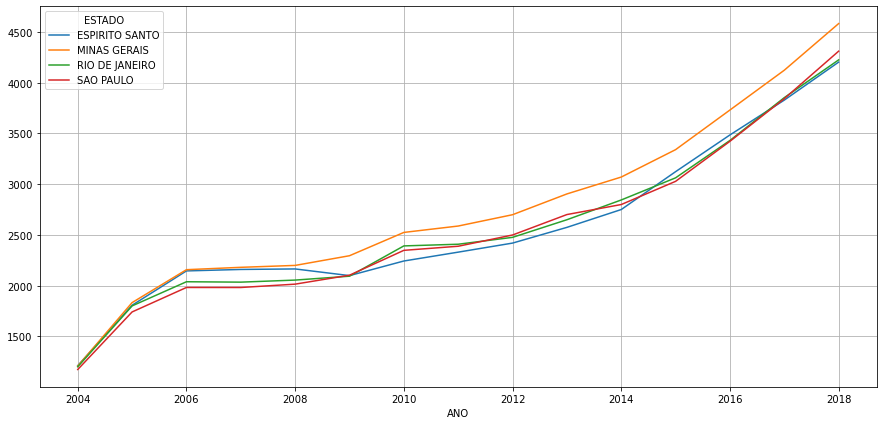

In [111]:
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["SUDESTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

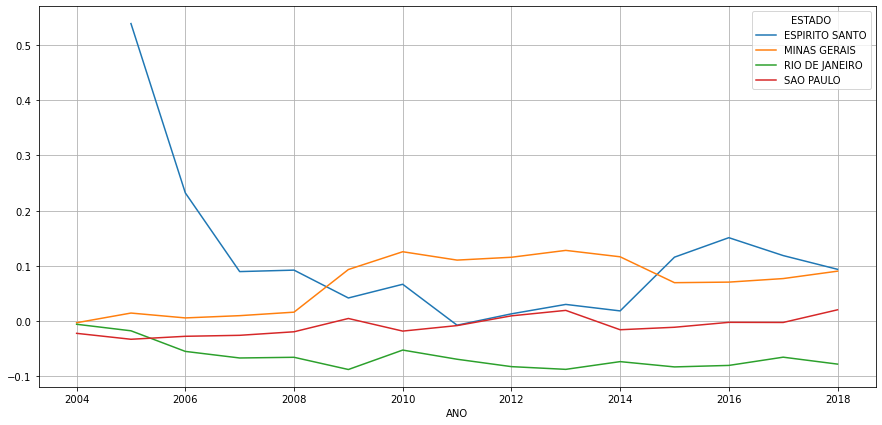

In [112]:
# Taxa de mudança de preço por ano nos estados. 
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["SUDESTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').pct_change().unstack().plot(ax=ax)
plt.grid(True)

No Sudeste a maior alta foi no estado de Minas Gerais de quase 10%. O Espirito Santo obteve uma taxa aparentemente igual.

### Centro-Oeste

In [123]:
gas.query('ANO!=2019 & REGIÃO in ["CENTRO OESTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   ESTADO            
2004  DISTRITO FEDERAL      1312.214
      GOIAS                 1188.929
      MATO GROSSO           1496.874
      MATO GROSSO DO SUL    1374.623
2005  DISTRITO FEDERAL      1932.277
      GOIAS                 1743.532
      MATO GROSSO           2209.863
      MATO GROSSO DO SUL    2033.280
2006  DISTRITO FEDERAL      2220.572
      GOIAS                 1998.234
      MATO GROSSO           2531.352
      MATO GROSSO DO SUL    2340.501
2007  DISTRITO FEDERAL      2279.347
      GOIAS                 2000.742
      MATO GROSSO           2535.208
      MATO GROSSO DO SUL    2332.609
2008  DISTRITO FEDERAL      2255.537
      GOIAS                 2007.075
      MATO GROSSO           2477.869
      MATO GROSSO DO SUL    2328.480
2009  DISTRITO FEDERAL      2319.633
      GOIAS                 2164.114
      MATO GROSSO           2598.671
      MATO GROSSO DO SUL    2432.166
2010  DISTRITO FEDERAL      2438.133
      GOIAS                 2411.957
      MATO GR

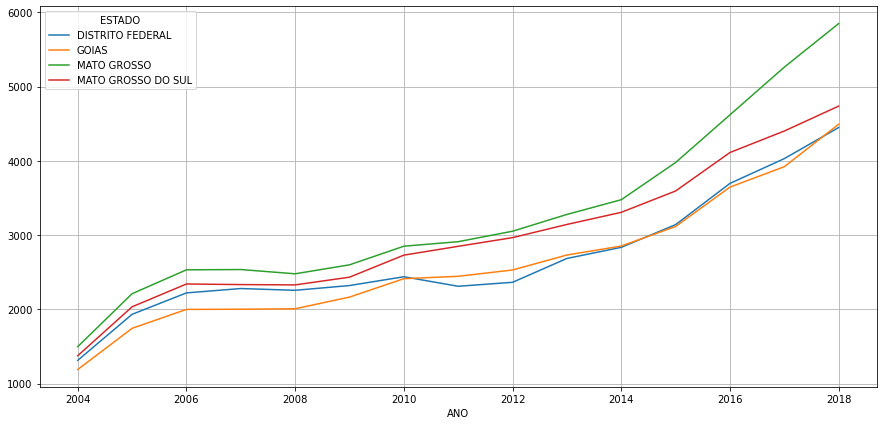

In [124]:
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["CENTRO OESTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

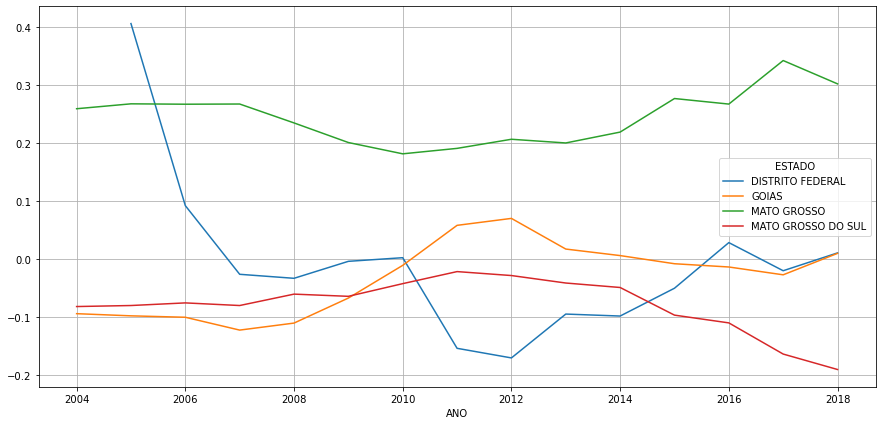

In [125]:
# Taxa de mudança de preço por ano nos estados. 
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["CENTRO OESTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').pct_change().unstack().plot(ax=ax)
plt.grid(True)

Mato Grosso apresenta tanto o maior preço quanto a maior taxa de aumento de 30%.

### Norte

In [117]:
gas.query('ANO!=2019 & REGIÃO in ["NORTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   ESTADO   
2004  ACRE         1511.363
      AMAPA        1368.294
      AMAZONAS     1234.852
      PARA         1274.538
      RONDONIA     1389.180
                     ...   
2018  AMAZONAS     4566.345
      PARA         4624.896
      RONDONIA     4832.117
      RORAIMA      4994.935
      TOCANTINS    5158.330
Name: PREÇO MÉDIO REVENDA, Length: 105, dtype: float64

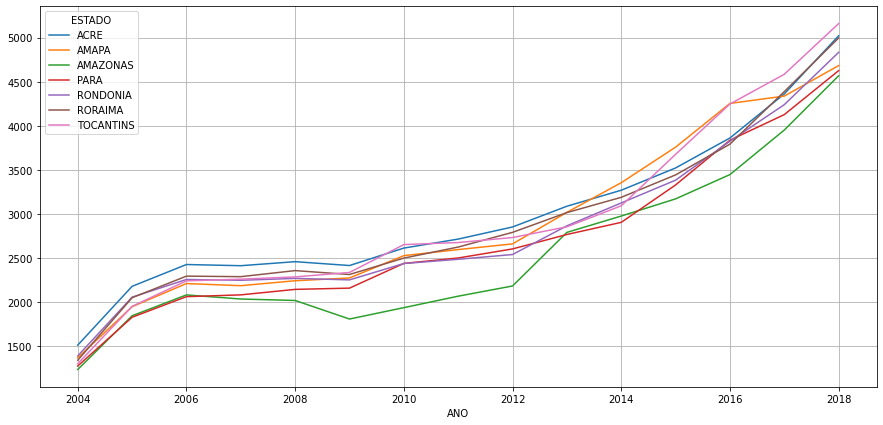

In [118]:
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["NORTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

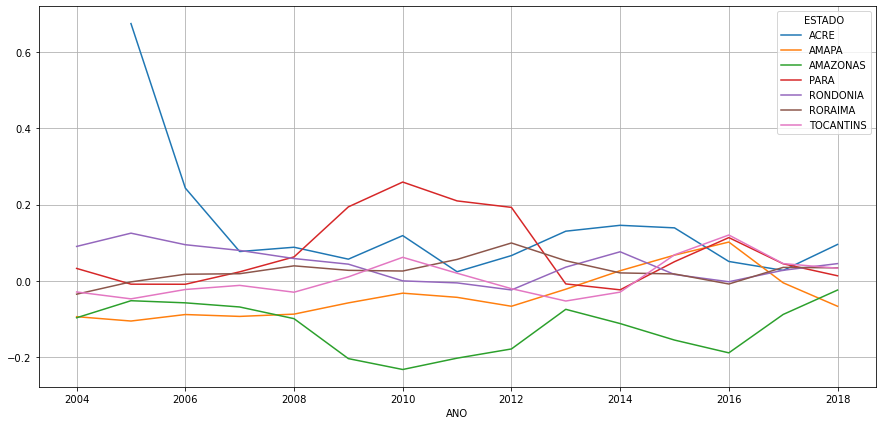

In [119]:
# Taxa de mudança de preço por ano nos estados. 
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["NORTE"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').pct_change().unstack().plot(ax=ax)
plt.grid(True)

Tocantins apresentou o maior valor e o Acre aproximadamente 1% de aumento como maior taxa

### Sul

In [120]:
gas.query('ANO!=2019 & REGIÃO in ["SUL"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   ESTADO           
2004  PARANA               1265.895
      RIO GRANDE DO SUL    1269.249
      SANTA CATARINA       1289.246
2005  PARANA               1844.628
      RIO GRANDE DO SUL    1944.656
      SANTA CATARINA       1971.358
2006  PARANA               2111.632
      RIO GRANDE DO SUL    2222.067
      SANTA CATARINA       2261.800
2007  PARANA               2052.677
      RIO GRANDE DO SUL    2183.433
      SANTA CATARINA       2237.597
2008  PARANA               2035.458
      RIO GRANDE DO SUL    2222.629
      SANTA CATARINA       2295.909
2009  PARANA               2162.584
      RIO GRANDE DO SUL    2226.826
      SANTA CATARINA       2303.926
2010  PARANA               2396.321
      RIO GRANDE DO SUL    2406.900
      SANTA CATARINA       2550.019
2011  PARANA               2421.772
      RIO GRANDE DO SUL    2479.794
      SANTA CATARINA       2600.714
2012  PARANA               2523.343
      RIO GRANDE DO SUL    2602.056
      SANTA CATARINA       2707.877
2013

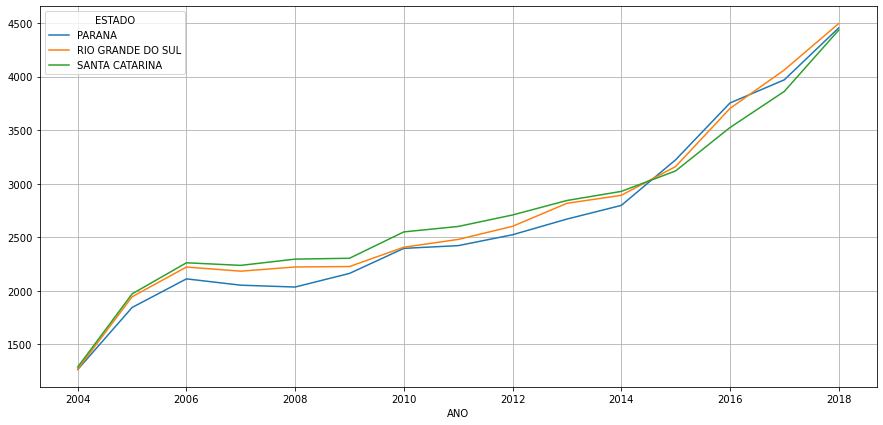

In [121]:
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["SUL"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').unstack().plot(ax=ax)
plt.grid(True)

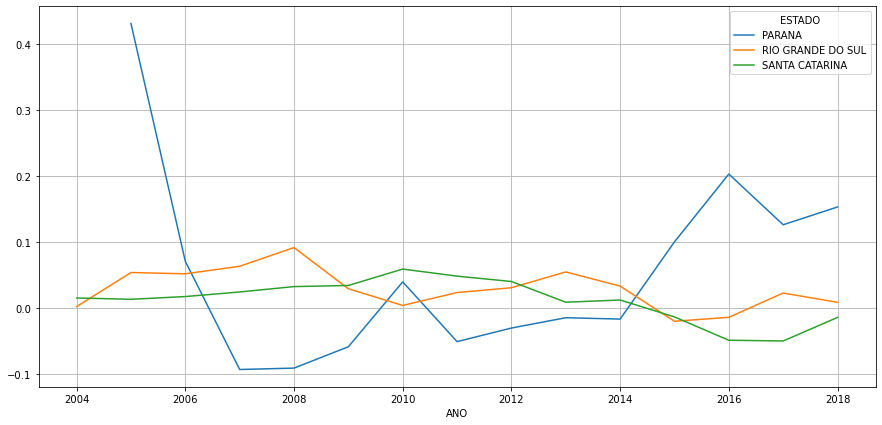

In [122]:
# Taxa de mudança de preço por ano nos estados. 
fig, ax = plt.subplots(figsize=(15,7))
gas.query('ANO!=2019 & REGIÃO in ["SUL"]').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum').pct_change().unstack().plot(ax=ax)
plt.grid(True)

Os 3 estados apresentaram valores muito semelhantes para o gás, com Rio Grande do Sul liderando por uma pequena diferença. No entanto o Paraná apresentou a maior taxa de aumento de cerca de 2.5%.

## Qual estado possui o gás mais barato e o mais caro?

### GLP

In [141]:
gas2.query('ANO!=2019').groupby(['ANO', 'ESTADO'])['PREÇO MÉDIO REVENDA'].agg('sum')

ANO   ESTADO        
2004  ACRE              1298.038
      ALAGOAS           1087.043
      AMAPA             1166.875
      AMAZONAS          1047.163
      BAHIA             1119.942
                          ...   
2018  RORAIMA           4202.835
      SANTA CATARINA    3687.402
      SAO PAULO         3591.853
      SERGIPE           3980.121
      TOCANTINS         4360.484
Name: PREÇO MÉDIO REVENDA, Length: 405, dtype: float64

In [147]:
pivot = gas2.pivot_table(index=['PREÇO MÁXIMO REVENDA', "ESTADO"], aggfunc='size')
pivot.sort_values(ascending=True)

PREÇO MÁXIMO REVENDA  ESTADO             
62.00                 SANTA CATARINA           1
1.99                  PERNAMBUCO               1
3.49                  RIO DE JANEIRO           1
                      ALAGOAS                  1
3.48                  TOCANTINS                1
                                            ... 
45.00                 TOCANTINS              162
35.00                 RIO GRANDE DO NORTE    173
40.00                 PERNAMBUCO             176
37.00                 PARAIBA                182
39.00                 DISTRITO FEDERAL       190
Length: 2857, dtype: int64

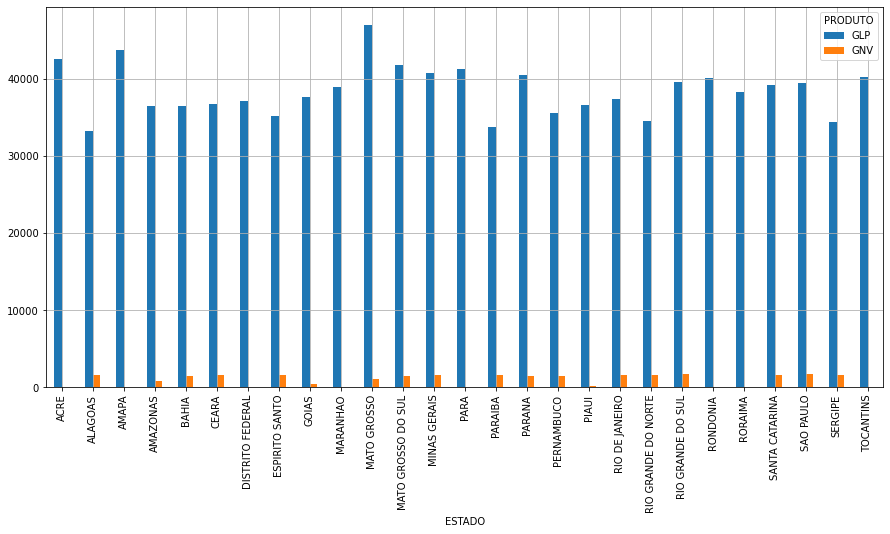

In [143]:
# Preço máximo do GLP por estado, por ano
fig, ax = plt.subplots(figsize=(15,7))
gas2.query('ANO!=2019').groupby(['ESTADO', 'PRODUTO'])['PREÇO MÁXIMO REVENDA'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)

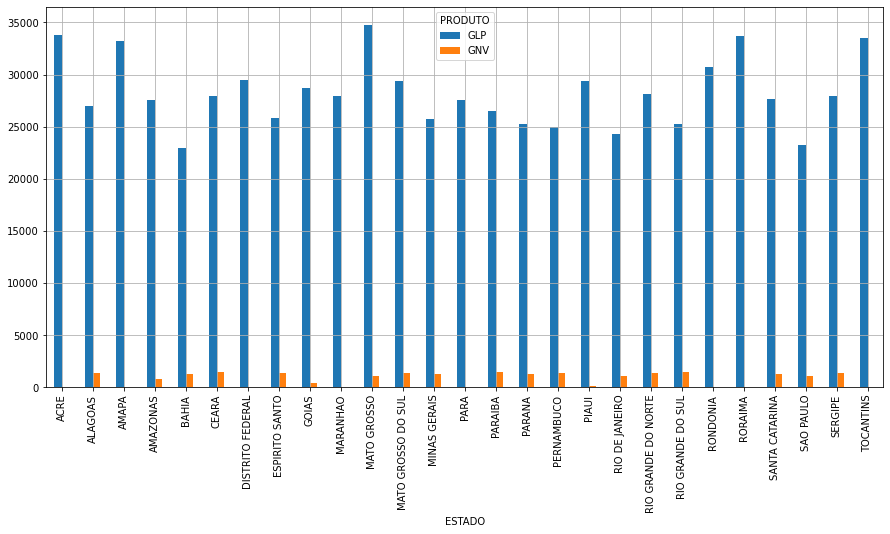

In [145]:
# Preço mínimo do GLP por estado, por ano
fig, ax = plt.subplots(figsize=(15,7))
gas2.query('ANO!=2019').groupby(['ESTADO', 'PRODUTO'])['PREÇO MÍNIMO REVENDA'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)

Mato grosso possui o maior preço máximo para o GLP (mais caro) e a Bahia o menor preço mínimo (mais barato).

### GNV

In [149]:
gas3 = gas.loc[(gas["PRODUTO"]=='GNV')]

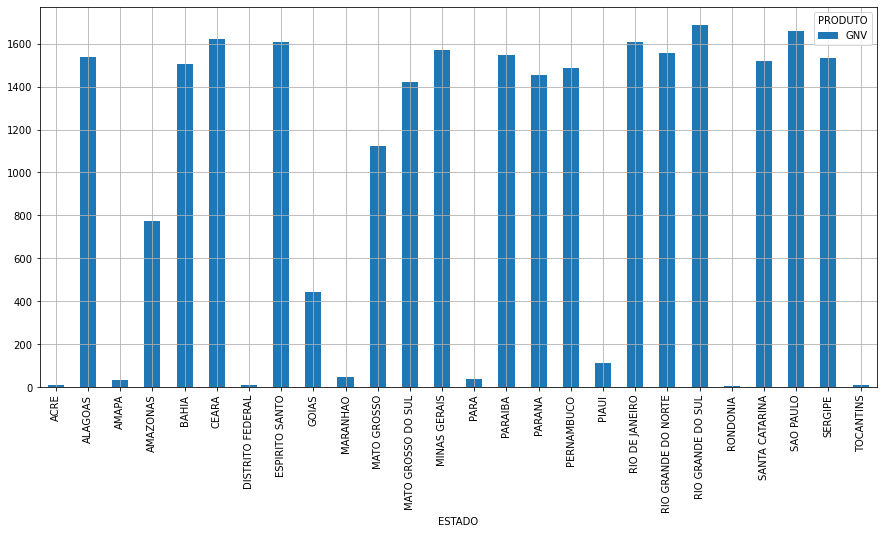

In [150]:
# Preço máximo do GLP por estado, por ano
fig, ax = plt.subplots(figsize=(15,7))
gas3.query('ANO!=2019').groupby(['ESTADO', 'PRODUTO'])['PREÇO MÁXIMO REVENDA'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)

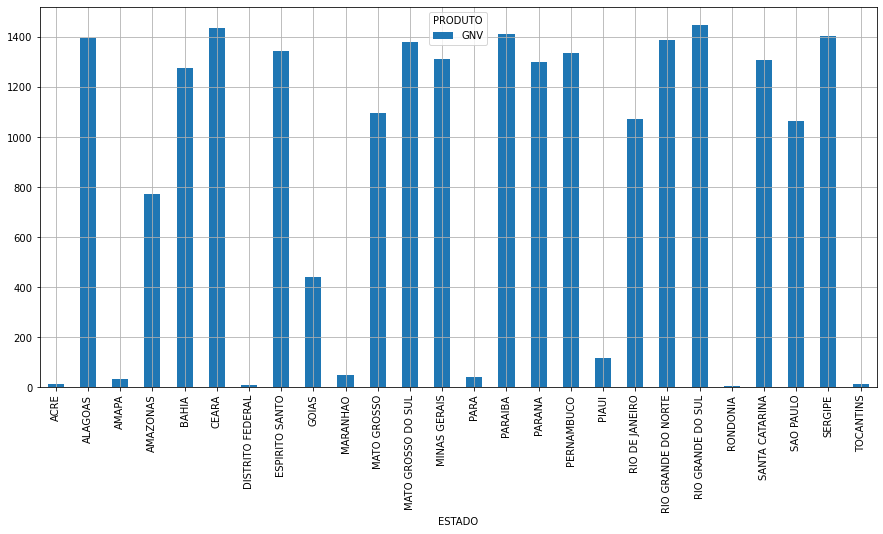

In [151]:
# Preço mínimo do GLP por estado, por ano
fig, ax = plt.subplots(figsize=(15,7))
gas3.query('ANO!=2019').groupby(['ESTADO', 'PRODUTO'])['PREÇO MÍNIMO REVENDA'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)

Rio Grande do Sul possui o maior preço máximo para o GNV (mais caro) e o Distrito Federal o menor preço mínimo (mais barato).